In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
type(dataset)

pandas.core.frame.DataFrame

# Handling missing values

In [4]:
dataset.isnull().any()

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

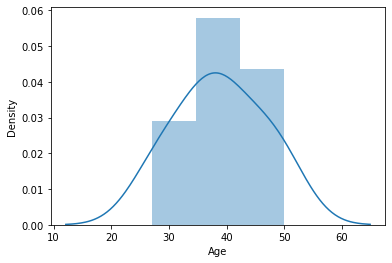

In [5]:
import seaborn as sns # Visualization library
sns.distplot(dataset['Age'].dropna()) # Drop null values and check the distribution

In [6]:
# We get normal distribution curve, so fill null values with mean of age
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [7]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,NaN,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

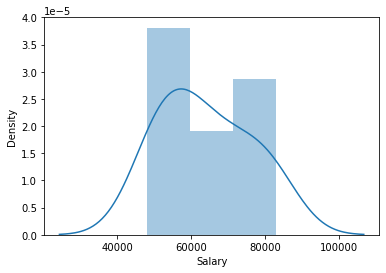

In [8]:
sns.distplot(dataset['Salary'].dropna())

In [9]:
# Almost normally ditributed so we go with mean
dataset['Salary'].fillna(dataset['Salary'].mean(),inplace=True)

In [10]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [11]:
dataset['Age']=dataset['Age'].round()  # Age can't be in decimals
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,39.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [12]:
dataset['Salary']=dataset['Salary'].round()
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [13]:
dataset.isnull().any()

Country      False
Age          False
Salary       False
Purchased    False
dtype: bool

# Separating independent and dependent variables

In [14]:
x=dataset.iloc[:,0:3].values # Independent variables, (all rows, first 3 columns)
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63778.0],
       ['France', 35.0, 58000.0],
       ['Spain', 39.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [15]:
y=dataset.iloc[:,-1].values  # Dependent column
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# Encoding categorical text variables

In [16]:
dataset['Country'].value_counts()

France     4
Germany    3
Spain      3
Name: Country, dtype: int64

In [17]:
x.shape # rows,columns as output

(10, 3)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
import sklearn
sklearn.__version__

'0.23.2'

In [20]:
ct= ColumnTransformer([("on",OneHotEncoder(drop='first'),[0])],remainder="passthrough") # index=0 is country in x for which we need to do OneHotEncoding
x=ct.fit_transform(x) # drop=first removes first column to drop the dummy variable
x # can add multiple index to perform onhotencoding on multiple columns

array([[0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 40.0, 63778.0],
       [0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 39.0, 52000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [21]:
x.shape

(10, 4)

In [22]:
x.shape

(10, 4)

In [23]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder # For the depdendent variable, because ordinal

In [25]:
lb=LabelEncoder()

In [26]:
y=lb.fit_transform((y))
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting of train and test data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # 20% test size

In [28]:
x_train

array([[1.0, 0.0, 40.0, 63778.0],
       [0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 39.0, 52000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [29]:
x_test

array([[1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 50.0, 83000.0]], dtype=object)

In [30]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [31]:
y_test

array([0, 0])

In [32]:
x_train.shape

(8, 4)